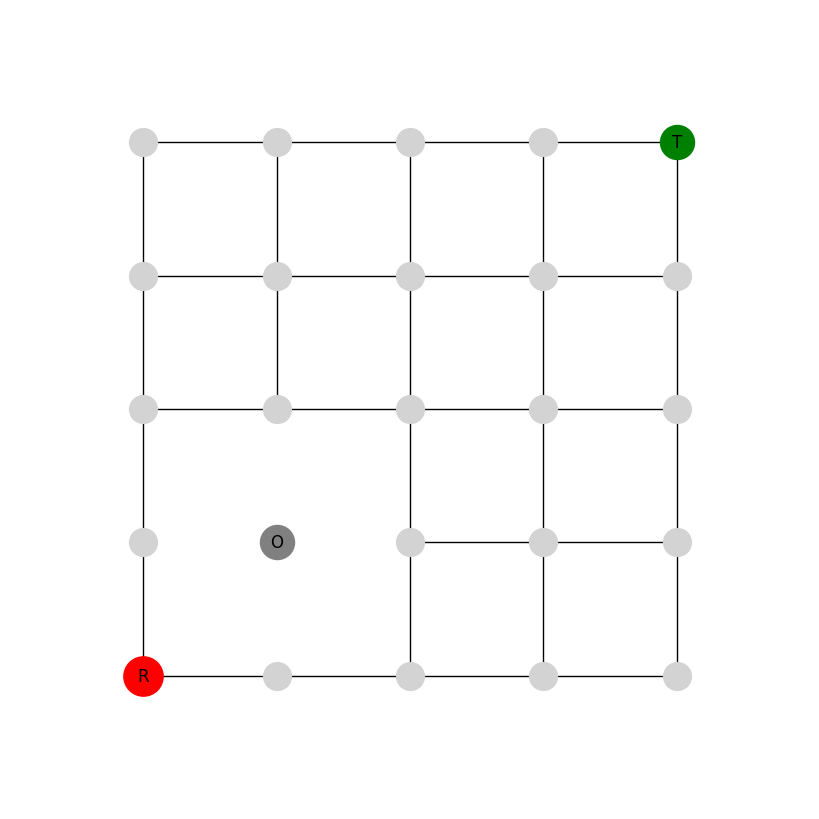

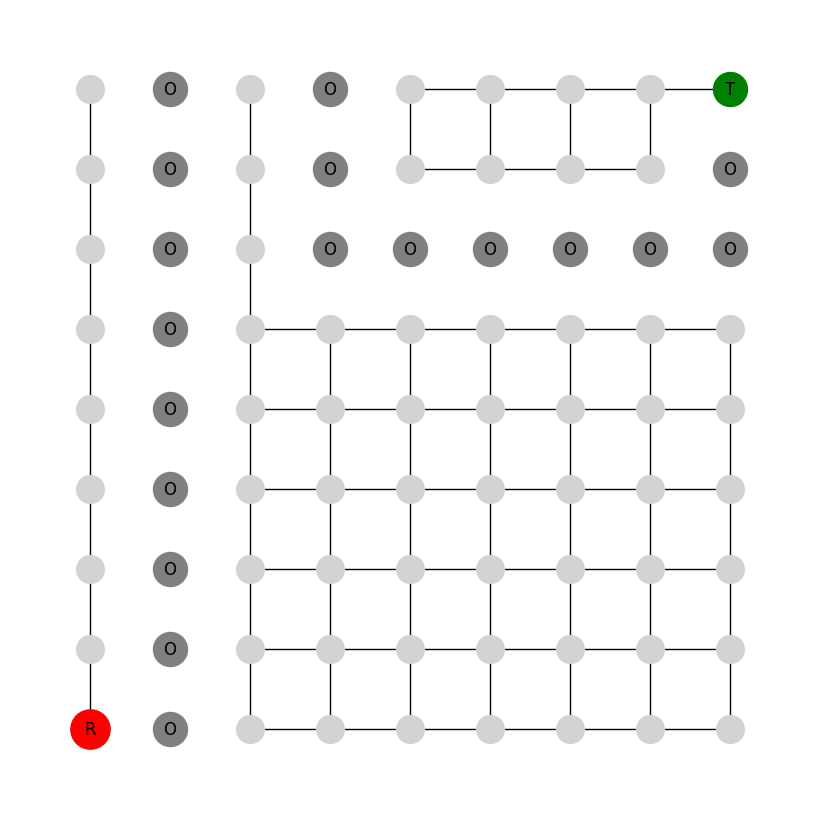

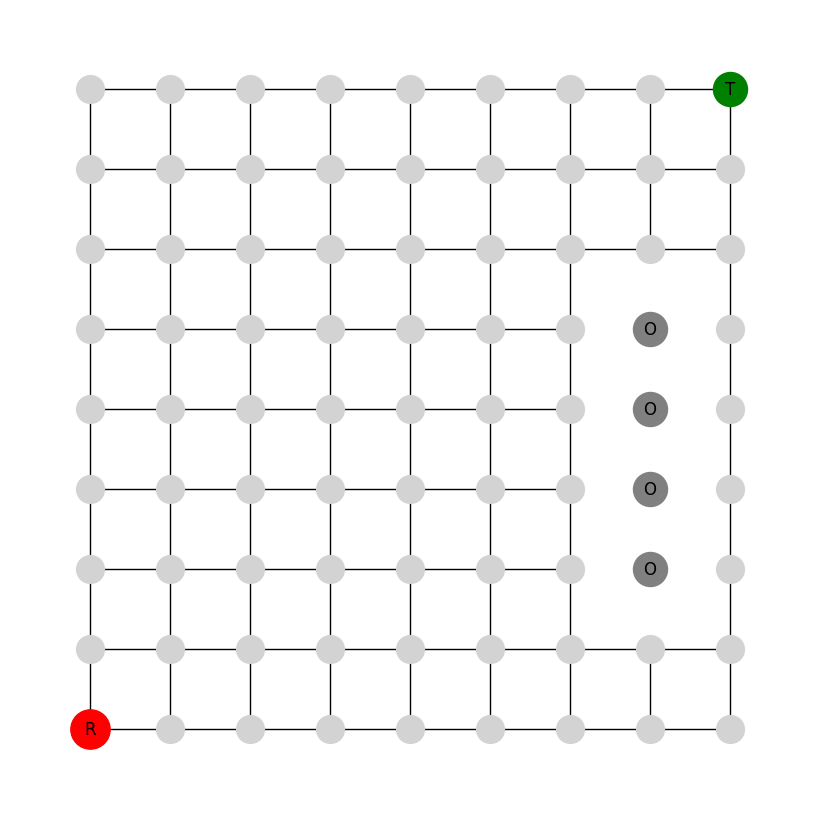

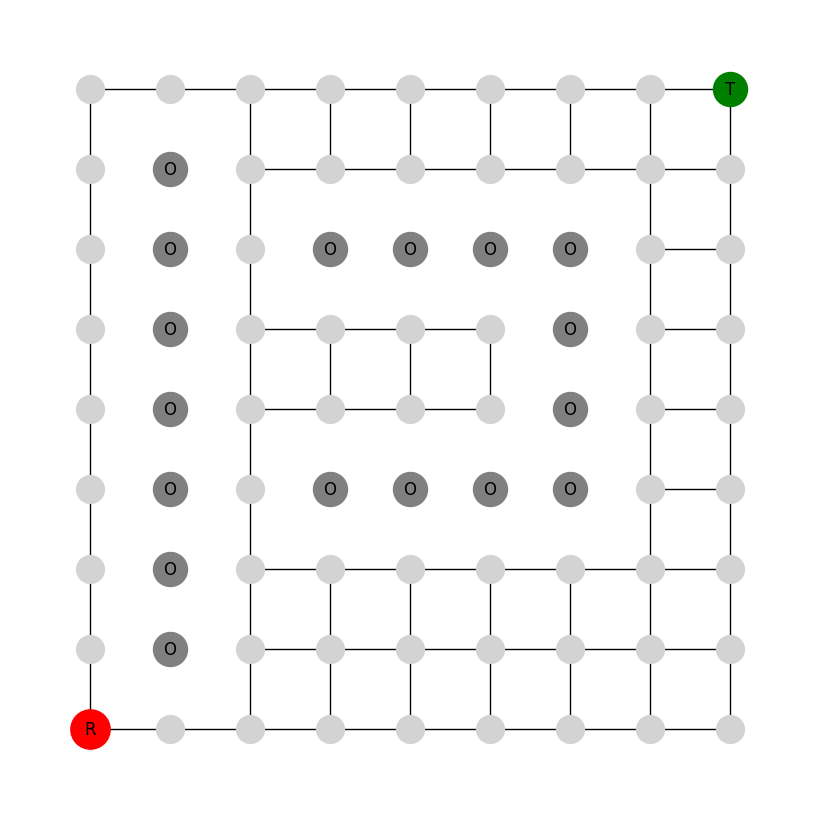

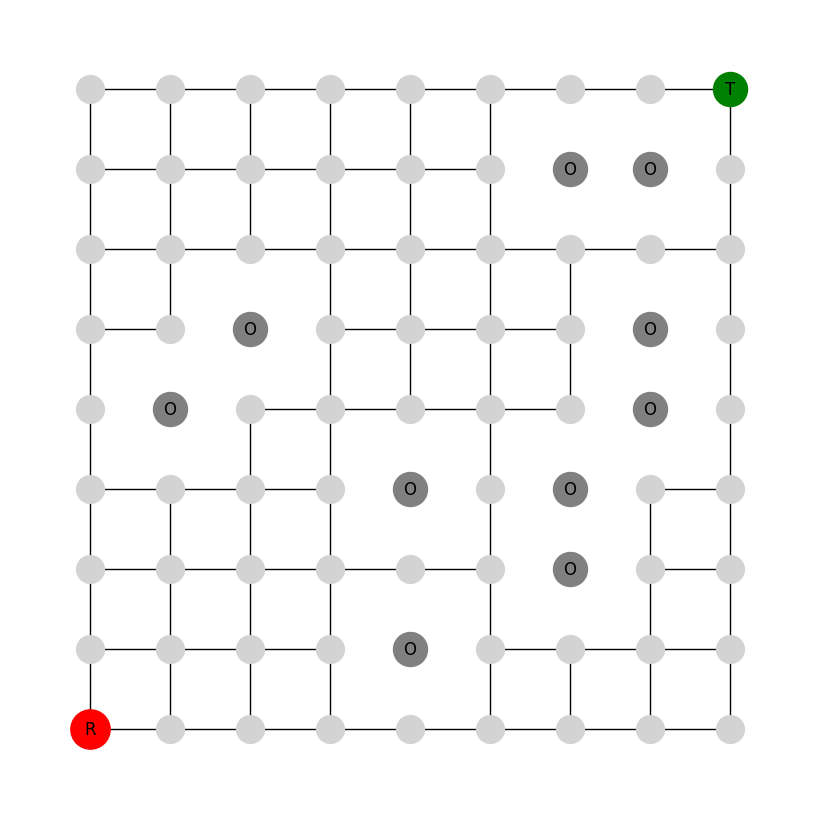

In [8]:
import networkx as nx

class Environment:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = [[0 for _ in range(width)] for _ in range(height)]
        self.robot_x = None
        self.robot_y = None

    def set_robot_position(self, x, y):
        if self.robot_x is not None and self.robot_y is not None:
            self.grid[self.robot_y][self.robot_x] = 0
        self.robot_x = x
        self.robot_y = y
        self.grid[self.robot_y][self.robot_x] = "R"

    def add_obstacle(self, x, y):
        self.grid[y][x] = "O"

    def add_cleaning_target(self, x, y):
        self.grid[y][x] = "T"

    def add_charging_station(self, x, y):
        self.grid[y][x] = "C"

    def move_forward(self):
        if self.robot_y > 0 and self.grid[self.robot_y - 1][self.robot_x] != "O":
            self.set_robot_position(self.robot_x, self.robot_y - 1)

    def move_backward(self):
        if self.robot_y < self.height - 1 and self.grid[self.robot_y + 1][self.robot_x] != "O":
            self.set_robot_position(self.robot_x, self.robot_y + 1)

    def turn_left(self):
        if self.robot_x > 0 and self.grid[self.robot_y][self.robot_x - 1] != "O":
            self.set_robot_position(self.robot_x - 1, self.robot_y)

    def turn_right(self):
        if self.robot_x < self.width - 1 and self.grid[self.robot_y][self.robot_x + 1] != "O":
            self.set_robot_position(self.robot_x + 1, self.robot_y)

    def cost(self, action):
        if action == "move_forward" or action == "move_backward":
            return 1
        elif action == "turn_left" or action == "turn_right":
            return 0.5

    def heuristic(self, target_x, target_y, obstacles):
        return abs(target_x - self.robot_x) + abs(target_y - self.robot_y) + len(obstacles)

    def a_star_search(self, target_x, target_y):
        frontier = PriorityQueue()
        start_node = (self.robot_x, self.robot_y, 0, [])
        frontier.put((0, start_node))
        explored = set()

        while not frontier.empty():
            _, node = frontier.get()
            x, y, cost_so_far, path = node

            if (x, y) == (target_x, target_y):
                return path

            if (x, y) in explored:
                continue

            explored.add((x, y))

            actions = ["move_forward", "move_backward", "turn_left", "turn_right"]

            for action in actions:
                new_cost = cost_so_far + self.cost(action)
                if action == "move_forward":
                    new_x, new_y = x, y - 1
                elif action == "move_backward":
                    new_x, new_y = x, y + 1
                elif action == "turn_left":
                    new_x, new_y = x - 1, y
                elif action == "turn_right":
                    new_x, new_y = x + 1, y

                if 0 <= new_x < self.width and 0 <= new_y < self.height and self.grid[new_y][new_x] != "O":
                    new_path = path + [action]
                    priority = new_cost + self.heuristic(target_x, target_y, new_path)
                    frontier.put((priority, (new_x, new_y, new_cost, new_path)))

        return None
    
# Simple Grid
env1 = Environment(width=5, height=5)
env1.set_robot_position(0, 0)
env1.add_obstacle(1, 1)
env1.add_cleaning_target(4, 4)

# Complex Grid
env2 = Environment(width=9, height=9)
env2.set_robot_position(0, 0)
env2.add_obstacle(1, 0)
env2.add_obstacle(1, 1)
env2.add_obstacle(1, 2)
env2.add_obstacle(1, 3)
env2.add_obstacle(1, 4)
env2.add_obstacle(1, 5)
env2.add_obstacle(1, 6)
env2.add_obstacle(1, 7)
env2.add_obstacle(3, 6)
env2.add_obstacle(3, 8)
env2.add_obstacle(4, 6)
env2.add_obstacle(5, 6)
env2.add_obstacle(6, 6)
env2.add_obstacle(7, 6)
env2.add_obstacle(8, 6)
env2.add_obstacle(8, 7)
env2.add_obstacle(8, 8)
env2.add_cleaning_target(8, 8)

# Narrow Passage Grid
env3 = Environment(width=9, height=9)
env3.set_robot_position(0, 0)
env3.add_obstacle(7, 2)
env3.add_obstacle(7, 3)
env3.add_obstacle(7, 4)
env3.add_obstacle(7, 5)
env3.add_cleaning_target(8, 8)

# Maze Grid
env4 = Environment(width=9, height=9)
env4.set_robot_position(0, 0)
env4.add_obstacle(1, 1)
env4.add_obstacle(1, 2)
env4.add_obstacle(1, 3)
env4.add_obstacle(1, 4)
env4.add_obstacle(1, 5)
env4.add_obstacle(1, 6)
env4.add_obstacle(1, 7)
env4.add_obstacle(3, 3)
env4.add_obstacle(3, 6)
env4.add_obstacle(4, 3)
env4.add_obstacle(4, 6)
env4.add_obstacle(5, 3)
env4.add_obstacle(5, 6)
env4.add_obstacle(6, 3)
env4.add_obstacle(6, 4)
env4.add_obstacle(6, 5)
env4.add_obstacle(6, 6)
env4.add_cleaning_target(8, 8)

# Randomized Grid
np.random.seed(42)
env5 = Environment(width=9, height=9)
env5.set_robot_position(0, 0)
for _ in range(10):
    x = np.random.randint(0, 9)
    y = np.random.randint(0, 9)
    env5.add_obstacle(x, y)
env5.add_cleaning_target(8, 8)

def visualize_environment(env):
    G = nx.Graph()
    grid = env.grid
    plt.figure(figsize=(8, 8))

    for y in range(env.height):
        for x in range(env.width):
            G.add_node((x, y))  # Add all nodes, including obstacles

    for y in range(env.height):
        for x in range(env.width):
            if grid[y][x] != "O":
                if y > 0 and grid[y-1][x] != "O":
                    G.add_edge((x, y), (x, y-1))
                if y < env.height - 1 and grid[y+1][x] != "O":
                    G.add_edge((x, y), (x, y+1))
                if x > 0 and grid[y][x-1] != "O":
                    G.add_edge((x, y), (x-1, y))
                if x < env.width - 1 and grid[y][x+1] != "O":
                    G.add_edge((x, y), (x+1, y))

    pos = {(x, y): (x, env.height - y - 1) for x, y in G.nodes()}

    nx.draw(G, pos, node_size=400, with_labels=False, node_color='lightgray', edge_color='black')
    
    # Draw obstacles
    obstacle_pos = [(x, y) for y in range(env.height) for x in range(env.width) if grid[y][x] == "O"]
    nx.draw_networkx_nodes(G, pos, nodelist=obstacle_pos, node_size=600, node_color='gray')
    
    # Draw cleaning targets
    target_pos = [(x, y) for y in range(env.height) for x in range(env.width) if grid[y][x] == "T"]
    nx.draw_networkx_nodes(G, pos, nodelist=target_pos, node_size=600, node_color='green')
    
    # Draw charging stations
    charging_pos = [(x, y) for y in range(env.height) for x in range(env.width) if grid[y][x] == "C"]
    nx.draw_networkx_nodes(G, pos, nodelist=charging_pos, node_size=600, node_color='blue')
    
    # Draw robot position
    robot_pos = (env.robot_x, env.robot_y)
    nx.draw_networkx_nodes(G, pos, nodelist=[robot_pos], node_size=800, node_color='red')
    
    # Draw labels
    labels = {}
    for y in range(env.height):
        for x in range(env.width):
            if (x, y) == robot_pos:
                labels[(x, y)] = 'R'
            elif (x, y) in obstacle_pos:
                labels[(x, y)] = 'O'
            elif (x, y) in target_pos:
                labels[(x, y)] = 'T'
            elif (x, y) in charging_pos:
                labels[(x, y)] = 'C'

    nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color='black')
    
    plt.xlim([-1, env.width])
    plt.ylim([-1, env.height])
    plt.gca().invert_yaxis()
    plt.xticks([])
    plt.yticks([])
    plt.show()

visualize_environment(env1)
visualize_environment(env2)
visualize_environment(env3)
visualize_environment(env4)
visualize_environment(env5)